Text(0.5, 0, 'Time [sec]')

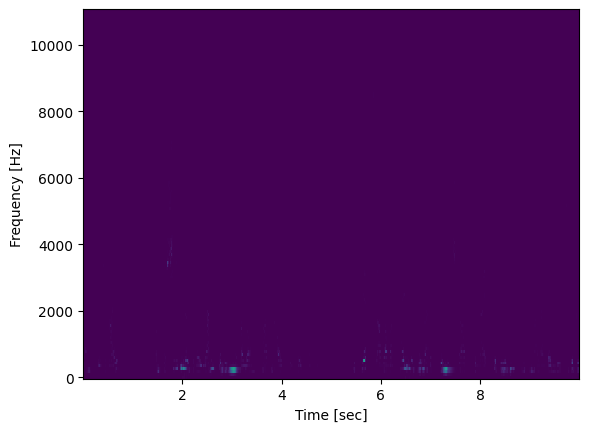

In [ ]:
import numpy as np
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt


data, samplerate = sf.read("./audio.flac")
freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
plt.pcolormesh(time, freq, Sxx)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')



Text(0.5, 0, 'Time [sec]')

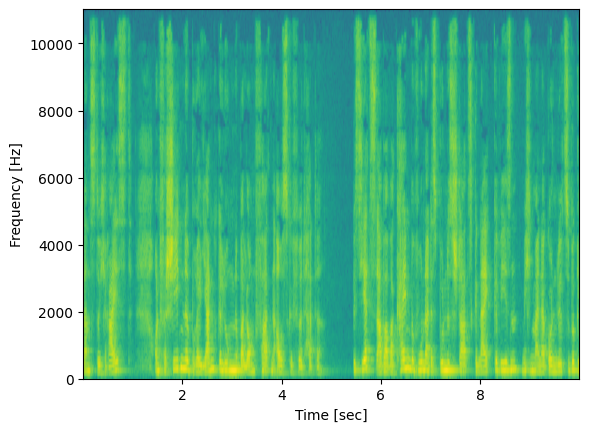

In [ ]:

Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

# Load Dataset from kaggle

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mozillaorg/common-voice

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 12.0G/12.0G [03:30<00:00, 150MB/s]
100% 12.0G/12.0G [03:30<00:00, 61.5MB/s]


In [ ]:
!unzip ./common-voice.zip

# spoken-language-identification dataset


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download toponowicz/spoken-language-identification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 14.9G/14.9G [04:01<00:00, 62.8MB/s]
100% 14.9G/14.9G [04:01<00:00, 66.4MB/s]


In [ ]:
!unzip ./spoken-language-identification.zip
mkdir ./train/train-img/
mkdir ./test/test-img/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa
import librosa.display
import gc
import os

In [ ]:
Data_dir=np.array(glob("./train/train/*"))

In [ ]:
print(len(Data_dir))

73080


## Create spectogram

In [ ]:
train_size= 1000
test_size= 100

In [ ]:
def create_spectrogram(filename,name, is_train=True):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    #S = librosa.feature.mfcc(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    prefix= './train/train-img/'
    if not is_train:
        prefix= './test/test-img/'
    filename  = prefix + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [ ]:
%%time
i=0
train_id = []
for file in Data_dir[i:i+train_size]:
    name = file.split('/')[-1]
    train_id.append(name+".jpg")
    create_spectrogram(file,name)
    print(name)

es_f_53b555eab2b3baada380f7d3ede20b20.fragment27.pitch4.flac
en_f_9a47e3d56398b8108f59385aab8bbe87.fragment15.noise10.flac
de_m_df90bffac026f705f4a99871d71684f1.fragment15.pitch6.flac
de_m_d22535879801cc9c4452d9ed9de5bf61.fragment25.speed7.flac
en_f_eddb714cb803dd6a58e6139f7462257e.fragment2.pitch2.flac
de_m_ce41a51416f32ba7bb772887de8e0ebf.fragment12.pitch8.flac
es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment9.noise9.flac
es_f_7b894c491011d0d541a071d6637b8de1.fragment16.noise3.flac
de_f_f856a0201f94b3b57b61815ef8b715d2.fragment23.noise12.flac
es_m_3068613fb44c320f7318311a86929dc7.fragment12.noise12.flac
en_m_011f3a2d0aa2880305c08b76873c3e10.fragment11.speed4.flac
en_m_d630900a88e2681c9d5d1026d7025d67.fragment24.flac
de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment12.speed3.flac
es_m_f7d959494477e5e7e33d4666f15311c9.fragment14.flac
es_m_7e1c8fd8bdbbd6844ddddbdf889f3364.fragment26.speed1.flac
de_m_d22535879801cc9c4452d9ed9de5bf61.fragment25.noise6.flac
es_f_2b24d20198e528ae803107e9beadacc9

In [ ]:
! rm ./train/*.jpg

rm: cannot remove './train/*.jpg': No such file or directory


In [ ]:
gc.collect()

11149

In [ ]:
print(train_id)
train_lang = []
for i in range(len(train_id)):
    train_lang.append(train_id[i].split('_')[0])
traindf=pd.DataFrame(train_id,columns = ['ID'])


['es_f_53b555eab2b3baada380f7d3ede20b20.fragment27.pitch4.flac.jpg', 'en_f_9a47e3d56398b8108f59385aab8bbe87.fragment15.noise10.flac.jpg', 'de_m_df90bffac026f705f4a99871d71684f1.fragment15.pitch6.flac.jpg', 'de_m_d22535879801cc9c4452d9ed9de5bf61.fragment25.speed7.flac.jpg', 'en_f_eddb714cb803dd6a58e6139f7462257e.fragment2.pitch2.flac.jpg', 'de_m_ce41a51416f32ba7bb772887de8e0ebf.fragment12.pitch8.flac.jpg', 'es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment9.noise9.flac.jpg', 'es_f_7b894c491011d0d541a071d6637b8de1.fragment16.noise3.flac.jpg', 'de_f_f856a0201f94b3b57b61815ef8b715d2.fragment23.noise12.flac.jpg', 'es_m_3068613fb44c320f7318311a86929dc7.fragment12.noise12.flac.jpg', 'en_m_011f3a2d0aa2880305c08b76873c3e10.fragment11.speed4.flac.jpg', 'en_m_d630900a88e2681c9d5d1026d7025d67.fragment24.flac.jpg', 'de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment12.speed3.flac.jpg', 'es_m_f7d959494477e5e7e33d4666f15311c9.fragment14.flac.jpg', 'es_m_7e1c8fd8bdbbd6844ddddbdf889f3364.fragment26.speed1.fla

In [ ]:
traindf

,ID
0,es_f_53b555eab2b3baada380f7d3ede20b20.fragment...
1,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...
2,de_m_df90bffac026f705f4a99871d71684f1.fragment...
3,de_m_d22535879801cc9c4452d9ed9de5bf61.fragment...
4,en_f_eddb714cb803dd6a58e6139f7462257e.fragment...
...,...
995,de_m_3aa01c55ba7ca85cad2977c848eb826f.fragment...
996,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...
997,en_m_29119ce8a7ecbf970f9a0728087c8ac3.fragment...
998,en_f_b6f3c74f569edd37b4bebd5b0c030497.fragment...


In [ ]:
traindf['lang'] = train_lang
#traindf.drop(columns='Class', inplace=True)

In [ ]:
traindf

,ID,lang
0,es_f_53b555eab2b3baada380f7d3ede20b20.fragment...,es
1,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...,en
2,de_m_df90bffac026f705f4a99871d71684f1.fragment...,de
3,de_m_d22535879801cc9c4452d9ed9de5bf61.fragment...,de
4,en_f_eddb714cb803dd6a58e6139f7462257e.fragment...,en
...,...,...
995,de_m_3aa01c55ba7ca85cad2977c848eb826f.fragment...,de
996,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,es
997,en_m_29119ce8a7ecbf970f9a0728087c8ac3.fragment...,en
998,en_f_b6f3c74f569edd37b4bebd5b0c030497.fragment...,en


In [ ]:
%%time
i=12000
test_id = []
for file in Data_dir[i:i+test_size]:
    name = file.split('/')[-1]
    test_id.append(name+'.jpg')
    create_spectrogram(file,name, is_train=False)
    print(name)

de_f_1996a0f045b3301946a9194dfad545ab.fragment5.noise3.flac
de_m_a6f9709552ce2ca93f28da21b8f3d8e3.fragment7.noise12.flac
de_m_0345d503166fbcb125b6e10e2e804443.fragment2.speed4.flac
en_m_6876763e37d7a41d6f53f4322a72b0d2.fragment26.noise10.flac
de_f_26ddc4e756f61233d74d42cc000c9dae.fragment11.noise6.flac
en_f_b6f3c74f569edd37b4bebd5b0c030497.fragment18.flac
es_f_47bd2e6178465cd745c86c9db5ffe447.fragment21.noise2.flac
de_f_404792fda5c66b95903adafd5a5f5d10.fragment30.noise1.flac
es_m_b8e0e6f56f02e6f8f79cc360958e5982.fragment16.noise10.flac
de_f_9bd3b58fe6f75dc40e85021914b4b06a.fragment17.noise7.flac
de_m_4d099776261f2267d3148a7e7e766d14.fragment24.noise10.flac
es_m_406bb0dc71a22051d900bc55cdfad59e.fragment4.speed1.flac
en_f_eddb714cb803dd6a58e6139f7462257e.fragment26.noise12.flac
de_f_6cc5c71681c0abc094a869e03b357384.fragment18.speed1.flac
de_f_404792fda5c66b95903adafd5a5f5d10.fragment2.speed3.flac
es_m_b8e0e6f56f02e6f8f79cc360958e5982.fragment15.noise5.flac
es_m_f7d959494477e5e7e33d4666f1

In [ ]:
testdf=pd.DataFrame(test_id,columns = ['ID'])

test_lang = []
for i in range(len(test_id)):
    test_lang.append(test_id[i].split('_')[0])

testdf['lang'] = test_lang


In [ ]:
testdf

,ID,lang
0,de_f_1996a0f045b3301946a9194dfad545ab.fragment...,de
1,de_m_a6f9709552ce2ca93f28da21b8f3d8e3.fragment...,de
2,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,de
3,en_m_6876763e37d7a41d6f53f4322a72b0d2.fragment...,en
4,de_f_26ddc4e756f61233d74d42cc000c9dae.fragment...,de
...,...,...
95,en_f_17211c49a9b2967b57cffaccf0d5b565.fragment...,en
96,en_f_17211c49a9b2967b57cffaccf0d5b565.fragment...,en
97,es_f_56ef0bde6c92a0100da23cdd39a8a112.fragment...,es
98,en_m_f7d28f7498eaf373b312abcdc0886951.fragment...,en


In [ ]:
!pip install Keras-Preprocessing
from keras_preprocessing.image import ImageDataGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)


train_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="./train/train-img",
    x_col="ID",
    y_col="lang",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

valid_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="./train/train-img",
    x_col="ID",
    y_col="lang",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 800 validated image filenames belonging to 3 classes.
Found 200 validated image filenames belonging to 3 classes.


In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import keras

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_49 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 activation_50 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 31, 31, 64)        0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=150
)
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID
)

Epoch 1/150


<ipython-input-137-f86d2eeb155e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


25/25 [==============================] - 30s 1s/step - loss: 1.1136 - accuracy: 0.3600 - val_loss: 1.0989 - val_accuracy: 0.3906
Epoch 2/150
25/25 [==============================] - 20s 810ms/step - loss: 1.0987 - accuracy: 0.3313 - val_loss: 1.0970 - val_accuracy: 0.3750
Epoch 3/150
25/25 [==============================] - 19s 774ms/step - loss: 1.0988 - accuracy: 0.3413 - val_loss: 1.1088 - val_accuracy: 0.2917
Epoch 4/150
25/25 [==============================] - 20s 799ms/step - loss: 1.0966 - accuracy: 0.3700 - val_loss: 1.0916 - val_accuracy: 0.3802
Epoch 5/150
25/25 [==============================] - 20s 808ms/step - loss: 1.1022 - accuracy: 0.4062 - val_loss: 1.0874 - val_accuracy: 0.3490
Epoch 6/150
25/25 [==============================] - 19s 770ms/step - loss: 1.0738 - accuracy: 0.4175 - val_loss: 1.0640 - val_accuracy: 0.4167
Epoch 7/150
25/25 [==============================] - 20s 774ms/step - loss: 1.0343 - accuracy: 0.4650 - val_loss: 1.0782 - val_accuracy: 0.4271
Epoch 8

<ipython-input-137-f86d2eeb155e>:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID


[3.703036069869995, 0.5416666865348816]

In [ ]:
model.save('./model/Model_CNN1000.h5')
gc.collect()

55272

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory="./test/test-img/",
    x_col="ID",
    y_col=None,
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(64,64))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 100 validated image filenames.


In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

<ipython-input-146-f904d4e6328a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


3/3 [==============================] - 1s 169ms/step


In [ ]:
predicted_class_indices.shape

(96,)

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (64, 64, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('./test/test-img/de_f_1996a0f045b3301946a9194dfad545ab.fragment5.noise3.flac.jpg')
model.predict(image)

1/1 [==============================] - 0s 26ms/step


array([[0.00409279, 0.2103718 , 0.78553545]], dtype=float32)

In [ ]:
train_generator.class_indices

{'de': 0, 'en': 1, 'es': 2}

In [ ]:
image = load('./ver2/test/test-img/handgen-img1.jpg')
model.predict(image)

1/1 [==============================] - 0s 35ms/step


array([[1.8000498e-04, 2.9245438e-02, 9.7057456e-01]], dtype=float32)